In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_data=pd.read_csv("Titanic.csv")

In [4]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_data.shape

(891, 12)

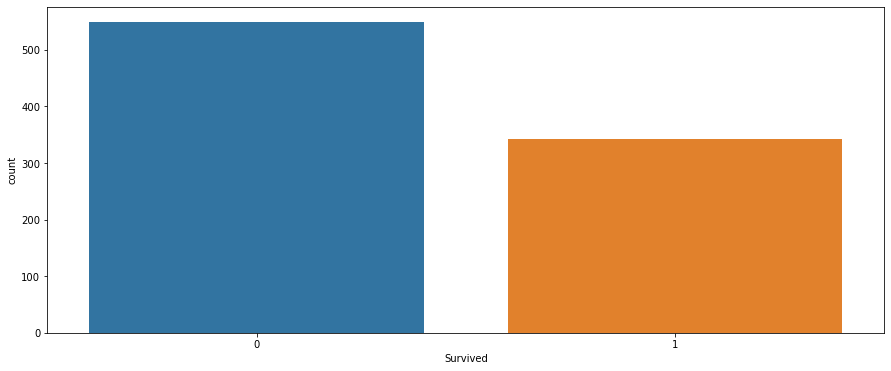

In [8]:
plt.figure(figsize=(15,6))
sns.countplot('Survived',data=titanic_data)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

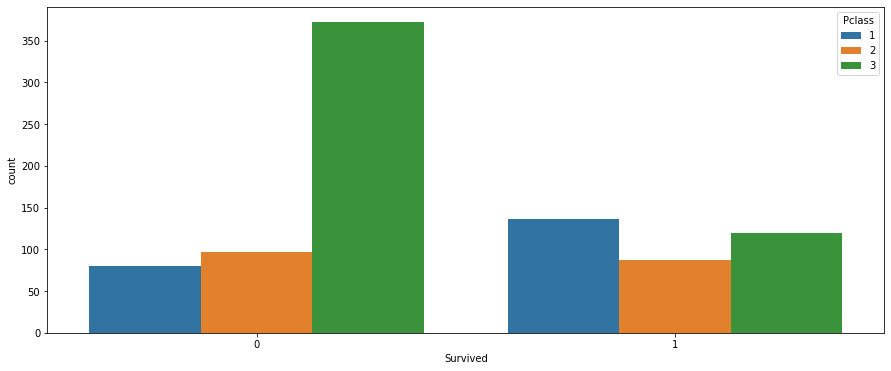

In [12]:
plt.figure(figsize=(15,6))
sns.countplot('Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

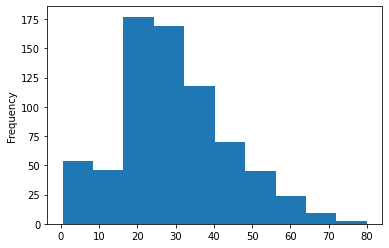

In [15]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

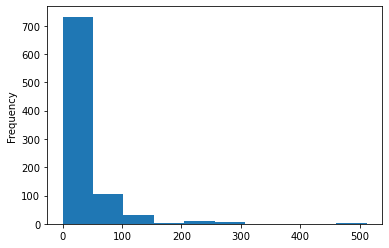

In [16]:
titanic_data["Fare"].plot.hist()

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


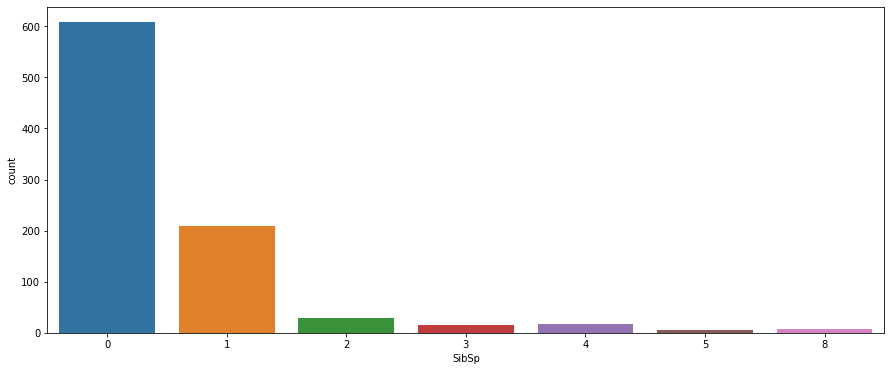

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('SibSp', data = titanic_data)
plt.show()

In [20]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

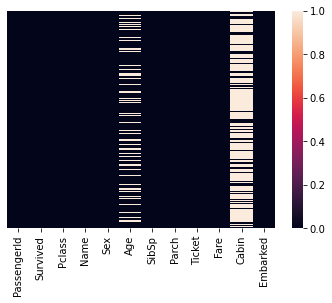

In [21]:
import seaborn as sns
sns.heatmap(titanic_data.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

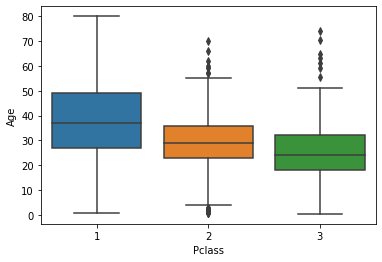

In [23]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [24]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [25]:
titanic_data.dropna(inplace=True)

In [26]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [30]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [34]:
titanic_data["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [35]:
pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [36]:
titanic_data=pd.concat([titanic_data,sex,pcl,embark],axis=1)

In [37]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,0,1,1,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [38]:
titanic_data.drop(["PassengerId","Name","Sex","Ticket","Embarked","Pclass"],axis=1,inplace=True)

In [39]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,0,1,1,0
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [43]:
x=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [44]:
x

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,0,1,1,0
886,27.0,0,0,13.0000,1,1,0,0,1
887,19.0,0,0,30.0000,0,0,0,0,1
889,26.0,0,0,30.0000,1,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel=LogisticRegression()

In [46]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [47]:
predictions=logmodel.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7710280373831776